# Workshop 2 -- Speech Processing -- Fundamentals

This is a short tutorial which introduced the basic terminology and helps you to start analyzing an audio signal.

We use <a href="https://librosa.github.io/librosa/">LibROSA</a>, a Python library to learn the basics of audio signal processing. Make sure the library is installed if you run this notebook on your laptop:

In [1]:
!pip install librosa
!apt-get --assume-yes install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


Librosa supports lots of <a href="https://en.wikipedia.org/wiki/Audio_codec">audio codecs</a>, although <a href="https://en.wikipedia.org/wiki/WAV">.wav(lossless)</a> is widely used when audio data analysis is concerned. You can read a given audio file by simply passing the <code>file_path</code> to <code>librosa.load()</code> function.

Imports

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

File download

In [3]:
!wget https://github.com/osaukh/mobile_computing_lab/raw/master/img/speechprocessing/1995-1826-0004.wav

--2022-03-29 20:41:14--  https://github.com/osaukh/mobile_computing_lab/raw/master/img/speechprocessing/1995-1826-0004.wav
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/osaukh/mobile_computing_lab/master/img/speechprocessing/1995-1826-0004.wav [following]
--2022-03-29 20:41:14--  https://raw.githubusercontent.com/osaukh/mobile_computing_lab/master/img/speechprocessing/1995-1826-0004.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97198 (95K) [audio/wav]
Saving to: ‘1995-1826-0004.wav’

1995-1826-0004.wav  100%[===================>]  94.92K  --.-KB/s    in 0.009s  

2022-03-29 20:41:14 

Read file content and show statistics

In [4]:
file_path="1995-1826-0004.wav"
samples, sampling_rate = librosa.load(file_path, sr=None, mono=True, offset=0.0, duration=None)

print("Number of samples:", len(samples))
print("Sampling rate:", sampling_rate)
print ("Duration:",  len(samples) / sampling_rate, " seconds")

Number of samples: 48560
Sampling rate: 16000
Duration: 3.035  seconds


Yes, you can play the audio inside your jupyter-notebook. IPython gives us a widget to play audio files through notebook.

In [5]:
from IPython.display import Audio
Audio(file_path)

We can easily plot the audio signal over time. LibROSA provides a utility function <code>waveplot()</code> as shown below.

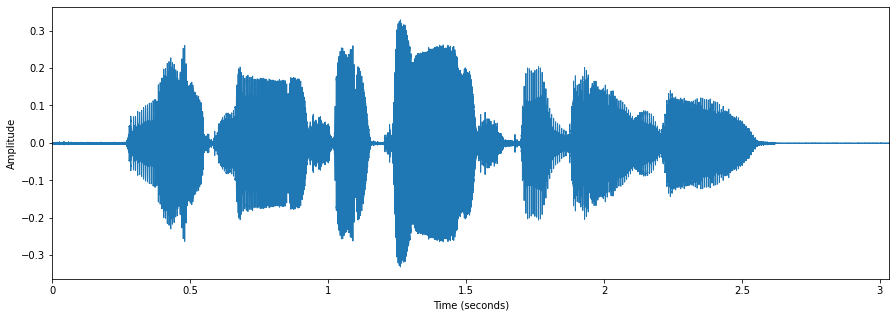

In [6]:
plt.figure(figsize=(15,5))
librosa.display.waveplot(y=samples, sr=sampling_rate)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

An audio signal is a complex signal which travel together as a disturbance (pressure-change) in the medium. When sound is recorded we only capture the resultant amplitudes of those multiple waves. <a href="https://en.wikipedia.org/wiki/Fourier_transform">Fourier Transform</a> decomposes a signal into its constituent frequencies. We obtain what we call a <a href="https://en.wikipedia.org/wiki/Spectrogram">spectrogram</a>!

The Mel Scale (Mel comes from the word melody) is a perceptual scale of pitches that are considered by human ears to be equal in distance from one another.

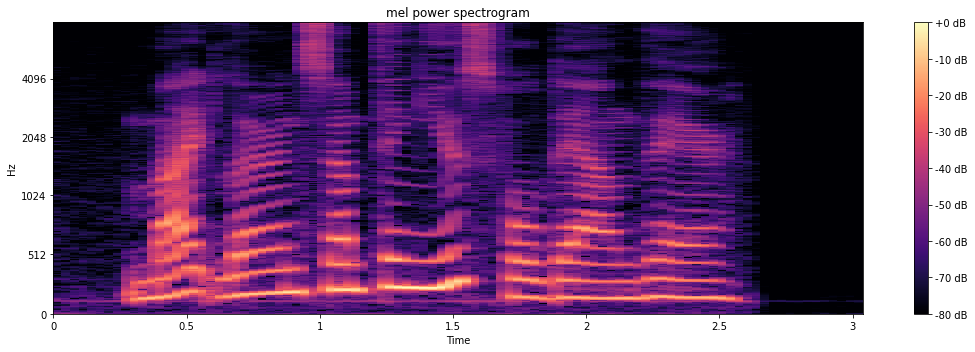

In [7]:
# Mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(samples, sr=sampling_rate, n_mels=512)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(15,5))
librosa.display.specshow(log_S, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+02.0f dB')
plt.title('mel power spectrogram')
plt.tight_layout()
plt.show() 

<a href="https://en.wikipedia.org/wiki/Mel-frequency_cepstrum">MFCC are Mel Frequency Cepstral Coefficients</a>. For a very basic understanding, <a href="https://en.wikipedia.org/wiki/Cepstrum">cepstrum</a> is the information of rate of change in spectral bands. In the conventional analysis of time signals, any periodic component (e.g., echoes) shows up as sharp peaks in the corresponding frequency spectrum (ie, Fourier spectrum. This is obtained by applying a Fourier transform on the time signal). On taking the log of the magnitude of this Fourier spectrum, and then again taking the spectrum of this log by a cosine transformation, we observe a peak wherever there is a periodic element in the original time signal. Since we apply a transform on the frequency spectrum itself, the resulting spectrum is neither in the frequency domain nor in the time domain and is called the *quefrency* domain. And this spectrum of the log of the spectrum of the time signal was named <a href="https://en.wikipedia.org/wiki/Cepstrum">cepstrum</a>.

Any sound generated by humans is determined by the shape of their vocal tract (including tongue, teeth, etc). If this shape can be determined correctly, any sound produced can be accurately represented. The following block diagram is a step-wise summary of how we arrived at MFCCs:

<img src="https://miro.medium.com/max/1714/1*dWnjn5LLS0j8St53ACwqSg.jpeg" width="500"/>

<a href="https://en.wikipedia.org/wiki/Filter_bank">Filter bank</a> refers to the Mel filters (coverting to Mel Scale) and Cepstral Coefficients are MFCCs.

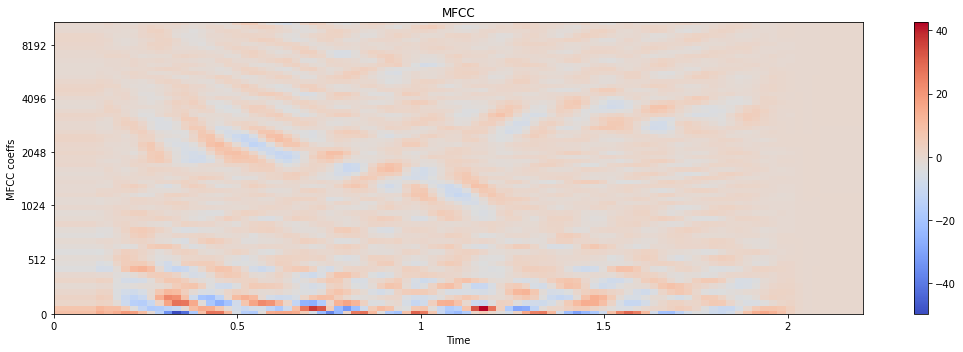

In [8]:
# MFCC_coeffs
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=64)

delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(15, 5))
librosa.display.specshow(delta2_mfcc, x_axis='time', y_axis='mel')
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()
plt.show()